In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## Helper Functions

In [274]:
# Helper functions

def cvplot(img):
    plt.imshow(img, interpolation = 'bicubic')
    plt.show()

def find_contours(img):
    
    # input :image 
    # output : contours, number of contours
    # image - 2D array 
    # contours - dictionary with keys representing different contours
    # number of contours - int
    regs ={}
    sh= img.shape
    for i in range(sh[0]):
        s=0
        f =0
        ranges =[]
        for j in range(sh[1]):

            if img[i][j] ==0:
                continue
                
            if img[i][j]==255:
                if img[i][j-1]==0:
                    s =j
                elif img[i][j+1]==0:
                    f=j

            if s !=0 and f!=0:
                ranges.append((s,f))
                s=0
                f=0

        if len(ranges) !=0:       
            n_reg =len(regs)

            if n_reg ==0:
                regs['reg{0}'.format(n_reg)]={}
                regs['reg0'][i] =ranges[0]

            elif n_reg !=0:
                for it in ranges:
                    f_r =0
                    for r in regs:
                        rx= max(regs[r].keys())
                        if i-rx ==1 and len(set(range(regs[r][rx][0],regs[r][rx][1]+1)).intersection(range(it[0],it[1]+1)))!=0:
                            f_r =1
                            regs[r][i]= it
                        else:
                            continue
                    if f_r ==0:
                        regs['reg{0}'.format(n_reg)]={}
                        regs['reg{0}'.format(n_reg)][i] =it
        con={}
    for reg in regs.keys():
        for x in regs[reg].keys():
            tu = regs[reg][x]
            l_r = len(range(tu[0],tu[1]))
            bb= list(zip([x]*l_r,range(tu[0],tu[1])))
            l= '{0}'.format(reg)
            if l in con.keys():
                for it in bb:
                    con[l].append(it)
            else:
                 con[l] =bb
    return con,len(con)
    
def plot_contour(con,img,n):
    m_img = np.zeros_like(img)
    l = list(con.keys())
    if n ==-1:
        for key in l:
            for i in con[key]:
                m_img[i[0],i[1]] = 255
            
    else:       
        key = l[n]
        for i in con[key]:
            m_img[i[0],i[1]] = 255
        
    return m_img

def find_area(con):
    area =[]
    l = list(con.keys())
    for key in l:
        area.append(len(con[key]))
    return area

def find_intensity(con,img):
    intensity =[]
    l = list(con.keys())
    for key in l:
        inten =0
        for i in con[key]:
            inten +=img[i[0],i[1]]
        intensity.append(inten)
    return intensity

def min_max(con,img):
    mn =[]
    mx =[]
    l = list(con.keys())
    for key in l:
        ls =[]
        for i in con[key]:
            ls.append(img[i[0],i[1]])
        mn.append(np.amin(ls))
        mx.append(np.amax(ls))
    return list(zip(mn,mx))

def find_centroid(con,img):
    centroid = []
    pi = find_intensity(con,img)
    l = list(con.keys())
    for reg  in range(len(l)):
        xs =0
        ys =0
        key = l[reg]
        for i in con[key]:
            p =img[i[0],i[1]]
            xs+=i[0]*p
            ys+=i[1]*p
        cx =int(round(xs/pi[reg]))
        cy =int(round(ys/pi[reg]))
        centroid.append((cy,cx))
    return centroid

def hist_dict(con,img):
    dcs =[]
    l = list(con.keys())
    for reg in range(len(l)):
        dct =  dict(zip(range(0,256),np.zeros(256)))
        key = l[reg]
        for i in con[key]:
            pxl =img[i[0],i[1]]
            dct[pxl]+=1
        dcs.append(dct)
    return dcs
    

## Main

Reading in and pre-processing the image.


In [250]:
# Reading in and converting image to grayscale
img = cv.imread('image.png')
g_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

Extracting the backgound and non-background pixels and assigning 0 or 255 to binarize the image.

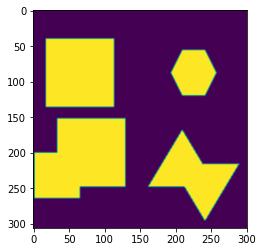

In [251]:
bg_pts = np.where(g_img <=15)
nbg_pts = np.where(g_img>15)

m_img = np.zeros_like(g_img)
m_img[bg_pts[0],bg_pts[1]] =0
m_img[nbg_pts[0],nbg_pts[1]] =255

cvplot(m_img)

In [252]:
con,n = find_contours(m_img)
print("Number of contours = ",n)

Number of contours =  4


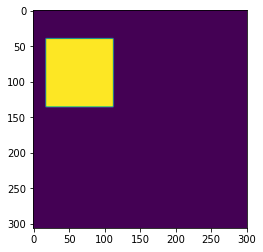

In [253]:
centroids = find_centroid(con,g_img)
c1 =plot_contour(con,g_img,0)
cvplot(c1)

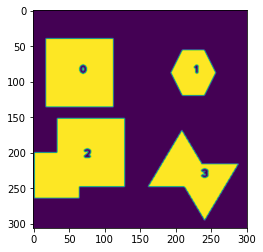

In [254]:
c =plot_contour(con,g_img,-1)
for i in range(n):    
    cv.putText(c, str(i), tuple(centroids[i]), 1, 1, (0, 0, 0), 2, cv.LINE_AA)
cvplot(c)

The contour number differs from the cv2 function implementation.

In [255]:
print("The number of pixels in each of the contours = ",find_area(con))

The number of pixels in each of the contours =  [9120, 3008, 11664, 6120]


In [256]:
print("Sum of pixel intensities in each of the contours = ",find_intensity(con,g_img))

Sum of pixel intensities in each of the contours =  [693120, 679808, 1621210, 387417]


In [257]:
print("The centroids of the contours = ", find_centroid(con,g_img))

The centroids of the contours =  [(65, 88), (225, 88), (71, 206), (236, 234)]


Plotting centroids of the contours.

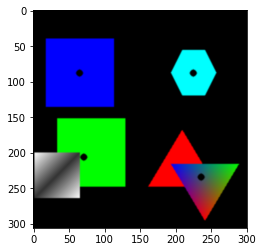

In [258]:
for i in range(n):
    cv.circle(img, tuple(centroids[i]),2,(0,0,0), thickness=5, lineType=8, shift=0)
cvplot(img)

In [261]:
print("The minimum and maximum intensities in each of the contours,respectively = ",min_max(con,g_img))

The minimum and maximum intensities in each of the contours,respectively =  [(76, 76), (226, 226), (51, 252), (29, 148)]


List containing the dictionary with pixels vs. intensity calculated for each contour.

In [275]:
dcs = hist_dict(con,g_img)

Plotting the number of pixels vs. intensity calculated using dictionaries

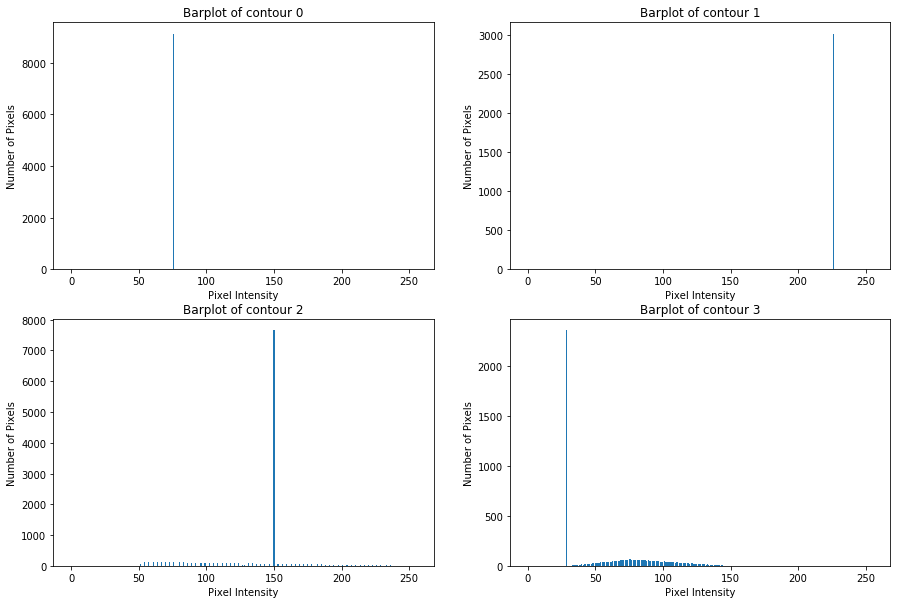

In [277]:
ds =hist_dict(con,g_img)
fig, axs = plt.subplots(2,int(n/2), figsize=(15, 10))
axs = axs.ravel()

for i in range(n):
    d =dcs[i]
    axs[i].bar(range(len(d)), d.values(), align='center')
    axs[i].set_title("Barplot of contour "+ str(i))
    axs[i].set_xlabel("Pixel Intensity")
    axs[i].set_ylabel("Number of Pixels")    
plt.show()